In [79]:
# pip install mne
# pip install numpy
# pip install matplotlib
# pip install asrpy #asr algorithm -> automatic noise rejection
# pip install EDFlib-Python  # export data to edf format
# pip install eeglabio # export data to .set format, which can be imported to eeglab 

In [5]:
import os
import mne
import numpy as np
# use asr algorithm to handle big noise pattern 
import asrpy
import matplotlib.pyplot as plt

In [6]:
%matplotlib widget
#%matplotlib inline

In [7]:
raw = mne.io.read_raw_edf('kym_5min.edf', verbose=0)
raw.resample(sfreq=250)

Sampling frequency of the instance is already 250.0, returning unmodified.


/tmp/ipykernel_368/1449777666.py:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG100C'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf('kym_5min.edf', verbose=0)


<RawEDF | kym_5min.edf, 4 x 81000 (324.0 s), ~9 kB, data not loaded>

In [8]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG100C-0, EEG100C-1, EEG100C-2, EEG100C-3
 chs: 4 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2023-06-12 18:05:20 UTC
 nchan: 4
 projs: []
 sfreq: 250.0 Hz
>

In [9]:
# raw.plot(duration=60, n_channels=len(raw.ch_names), remove_dc=False)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


/tmp/ipykernel_368/2847632005.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


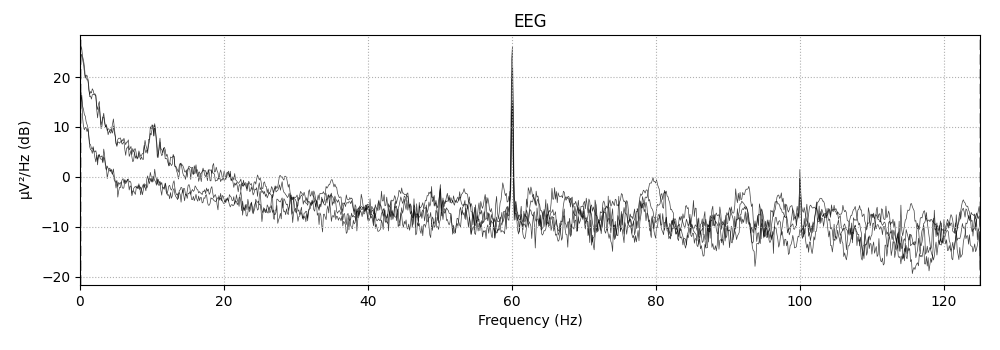

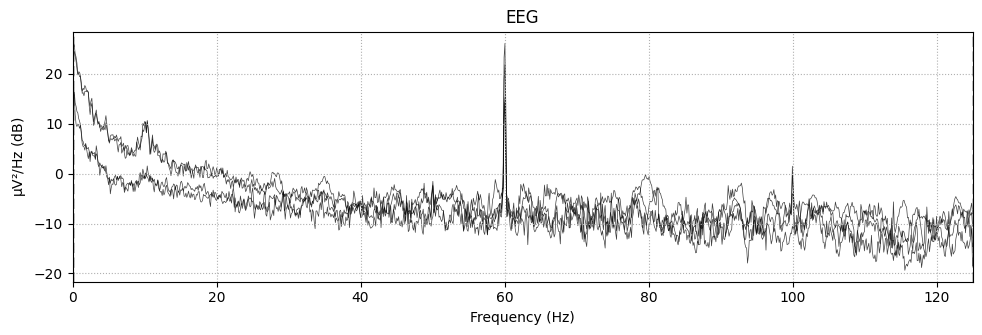

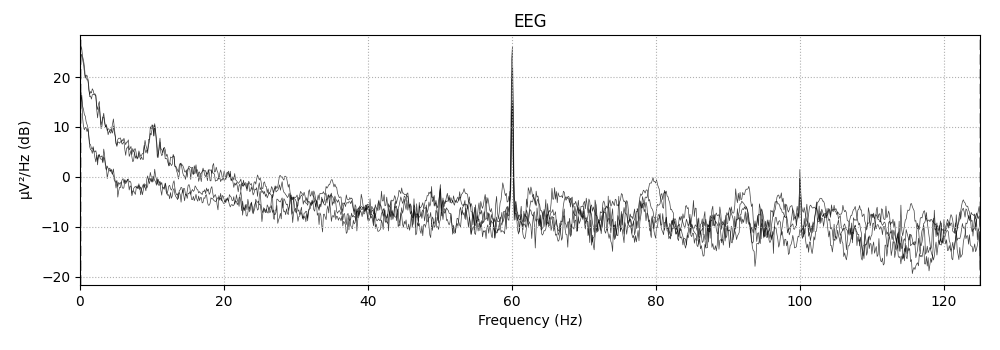

In [10]:
raw.plot_psd()

In [11]:
raw.load_data()

Reading 0 ... 80999  =      0.000 ...   323.996 secs...


<RawEDF | kym_5min.edf, 4 x 81000 (324.0 s), ~2.5 MB, data loaded>

In [12]:
#raw_filtered = raw.load_data().filter(l_freq=1, h_freq= 50)
raw.notch_filter(freqs=60)
raw.filter(l_freq=1, h_freq=50)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


<RawEDF | kym_5min.edf, 4 x 81000 (324.0 s), ~2.5 MB, data loaded>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


/tmp/ipykernel_368/2847632005.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


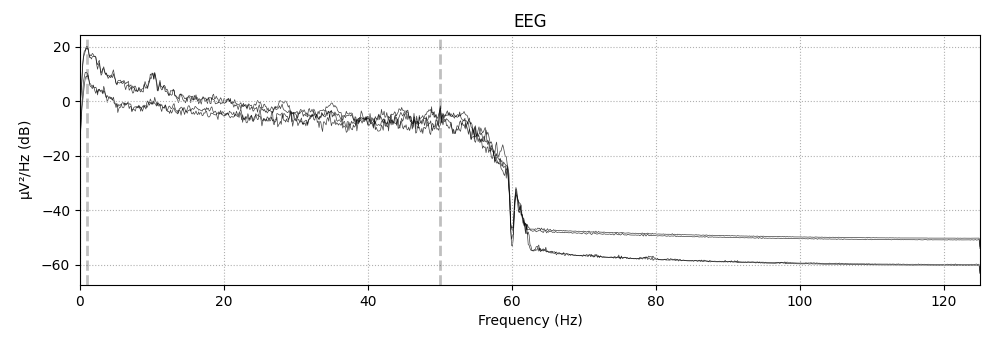

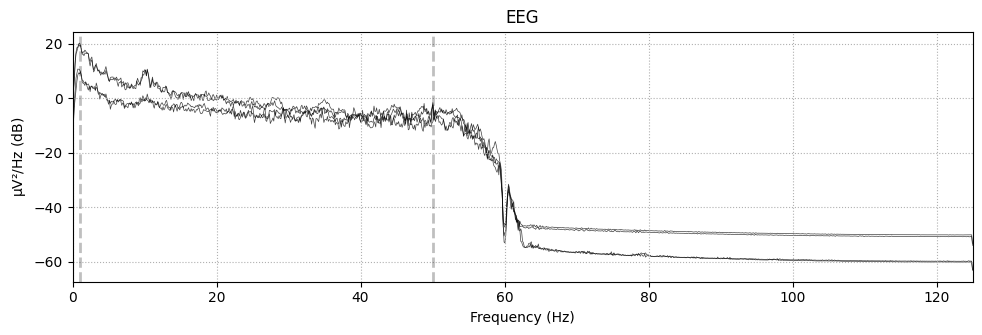

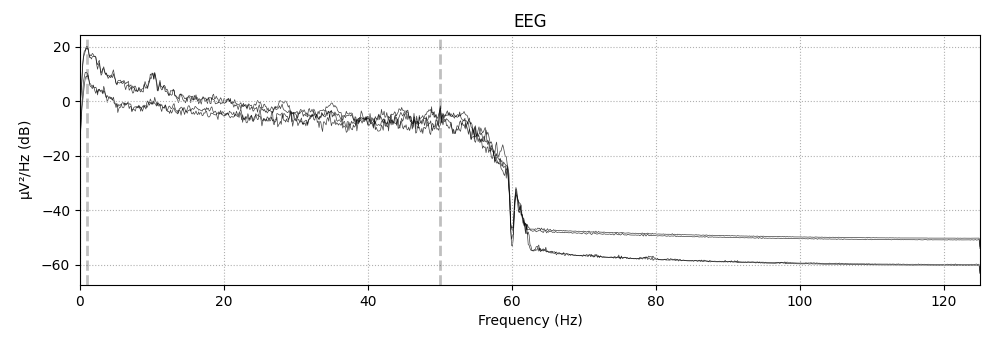

In [13]:
raw.plot_psd()

In [14]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG100C-0, EEG100C-1, EEG100C-2, EEG100C-3
 chs: 4 EEG
 custom_ref_applied: False
 highpass: 1.0 Hz
 lowpass: 50.0 Hz
 meas_date: 2023-06-12 18:05:20 UTC
 nchan: 4
 projs: []
 sfreq: 250.0 Hz
>

Using matplotlib as 2D backend.


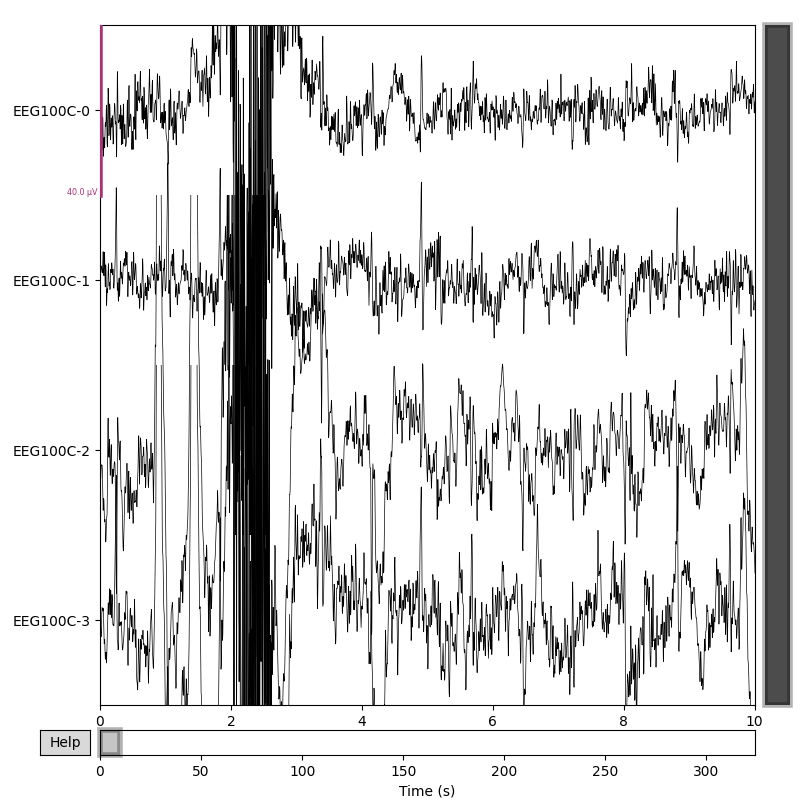

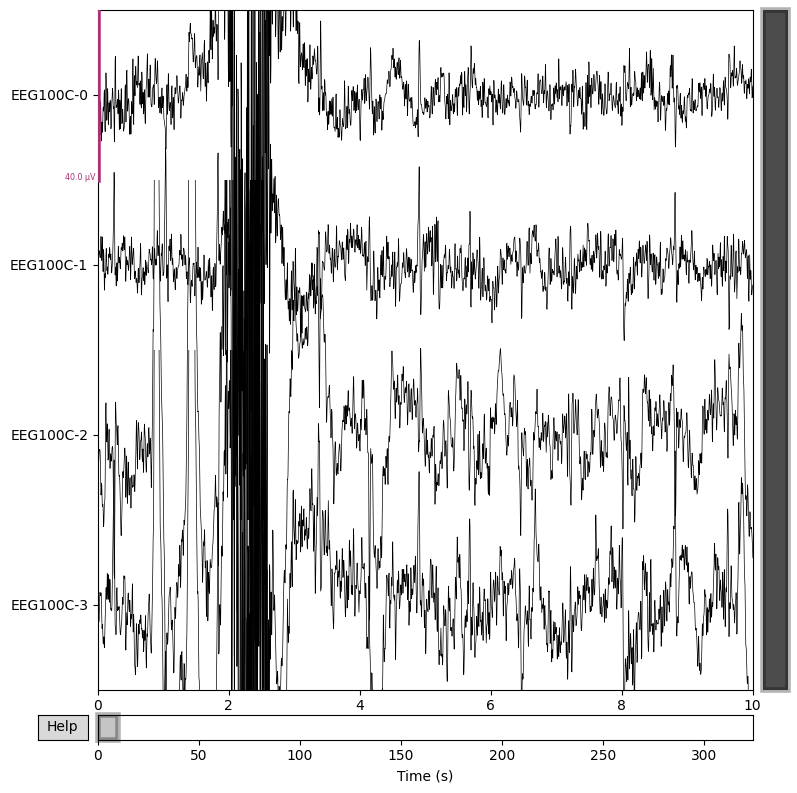

In [15]:
raw.plot(duration=10, start=0, n_channels=len(raw.ch_names), remove_dc=True)

In [16]:
# remove ECG artifacts

#ecg_epochs = mne.preprocessing.create_ecg_epochs(raw, ch_name='EEG100C-1', keep_ecg=False)

In [17]:
#ecg_epochs.plot_image(combine='mean')

In [18]:
#raw.plot(duration=10,start=50, events=ecg_epochs.events,  event_color='red', scalings=None)

In [19]:
#avg_ecg_epochs = ecg_epochs.average().apply_baseline((-0.5, -0.2))

In [20]:
#ecg_epochs.events

In [21]:
#raw.add_events(events=ecg_epochs.events, stim_channel='EEG100C-2')

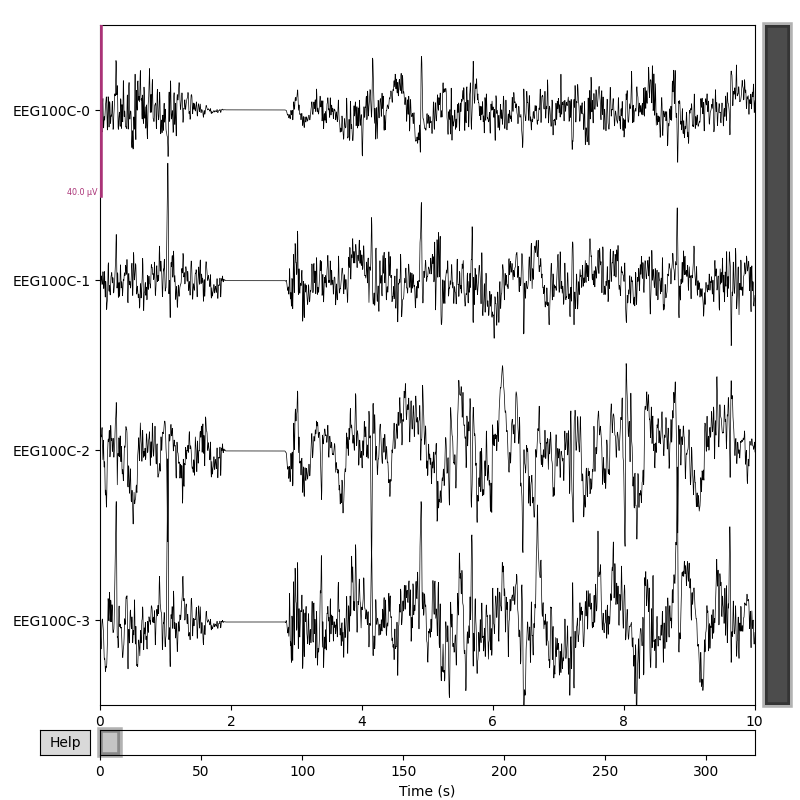

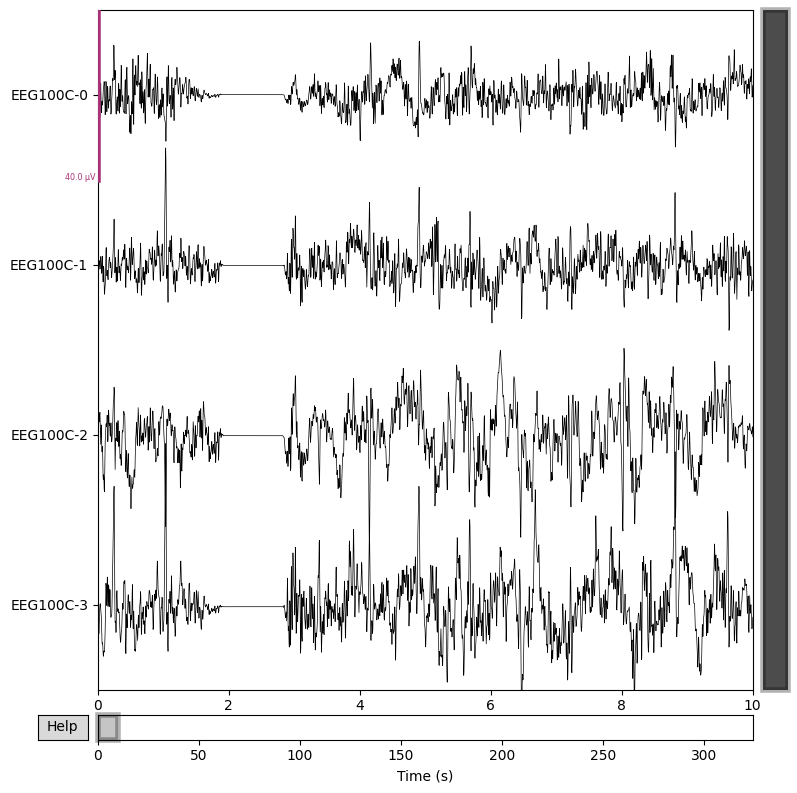

In [22]:
# use asr algorithm to handle big noise pattern 
import asrpy
asr = asrpy.ASR(
    sfreq=raw.info["sfreq"], 
    blocksize=200, 
    cutoff=2.5, 
    win_len=0.5, 
    win_overlap=0.66
)

asr.fit(raw.load_data())
raw = asr.transform(raw.load_data())


plt.close()
raw.plot(duration=10, start=0, title='with ASR auto rejection')

In [ ]:
ecg_events[0][:10]

In [ ]:
ecg_events[0][:, 0][:10]

In [ ]:
ecg_events[3][0, :-10]

In [24]:
ecg_events = mne.preprocessing.find_ecg_events(raw, ch_name='EEG100C-1', tstart=0, return_ecg=True)

# set boundary 
onsets = ecg_events[0][: , 0] / raw.info["sfreq"] - 0.05
durations = [0.1] * len(ecg_events[0])
descriptions = ['bad'] * len(ecg_events[0])

#convert event to annotation
ecg_annot = mne.Annotations(
    onsets, durations, descriptions, orig_time=raw.info["meas_date"]
)

raw.set_annotations(ecg_annot)

Using channel EEG100C-1 to identify heart beats.
Setting up band-pass filter from 5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 35.25 Hz)
- Filter length: 2500 samples (10.000 s)

Number of ECG events detected : 354 (average pulse 65 / min.)


<RawEDF | kym_5min.edf, 4 x 81000 (324.0 s), ~2.5 MB, data loaded>

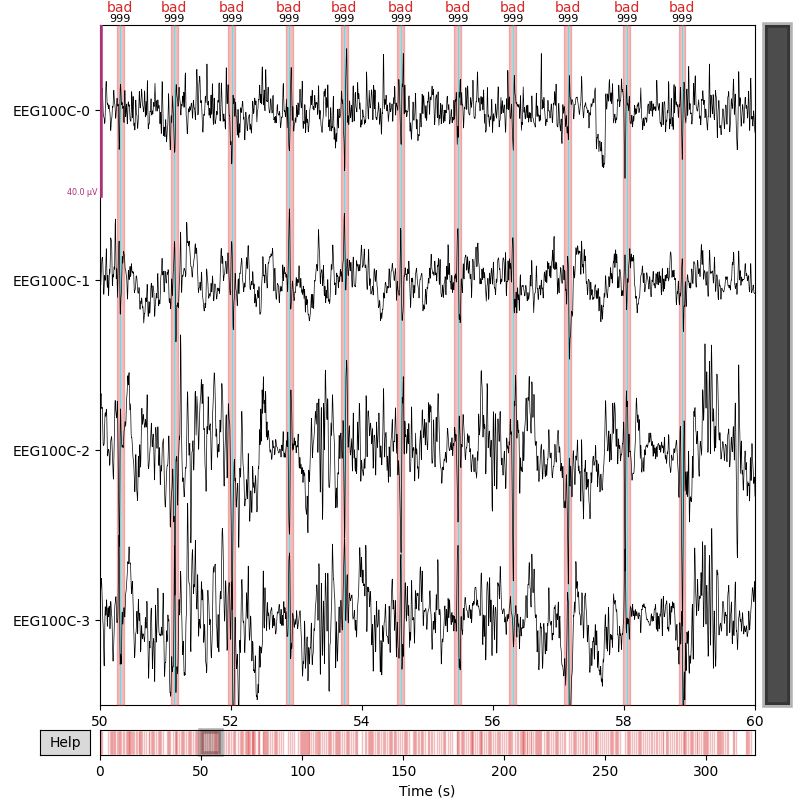

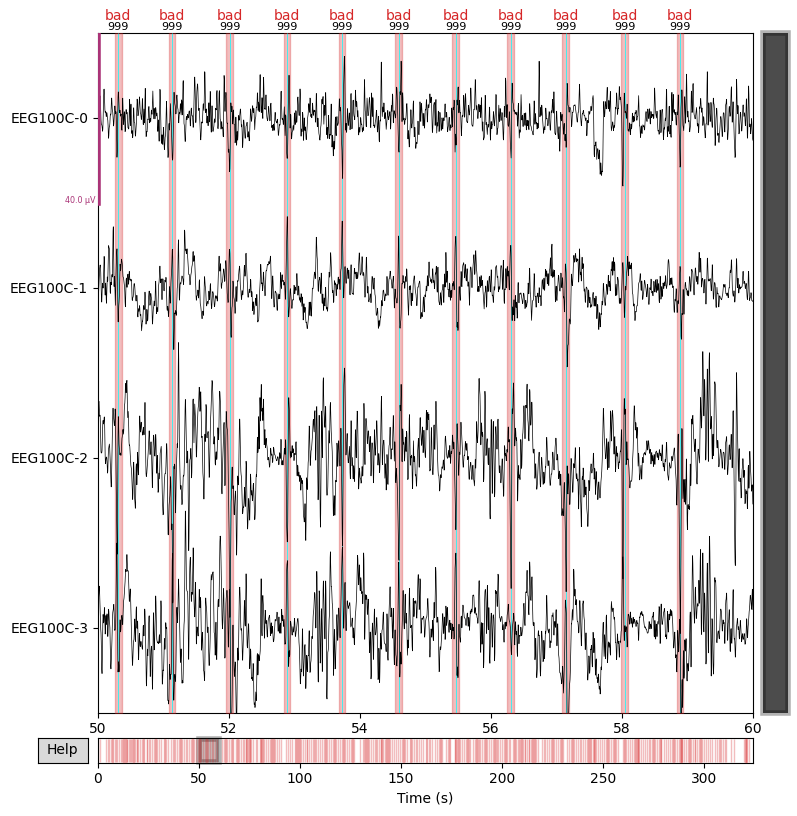

In [25]:
eeg_picks = mne.pick_types(raw.info, meg=False, eeg=True)

raw.plot(duration=10, start=50, events=ecg_events[0], order=eeg_picks)

In [26]:
len(raw.annotations)

354

In [ ]:
 raw.annotations.description[0]

In [ ]:
raw.annotations[53]['onset']

In [27]:
def reject_bad_segs(raw):
    """ This function rejects all time spans annotated as 'bad' and concatenates the rest"""
    container_list = []
    for index in range(len(raw.annotations)-1): #index start with 0
        copy = raw.copy()
        duration = 0.2

        if index == 0:
            cropped_raw = raw.copy().crop(tmin=0, tmax=raw.annotations[index]['onset']-duration/2)
        else:
            try:
                cropped_raw = raw.copy().crop(tmin= raw.annotations[index]['onset']+duration/2,  tmax= raw.annotations[index +1]['onset']-duration/2)
            except ValueError:
                pass
        
        container_list.append(cropped_raw)

    concatenated_raw = mne.concatenate_raws(container_list)
    return concatenated_raw

In [28]:
crop_raw = reject_bad_segs(raw)

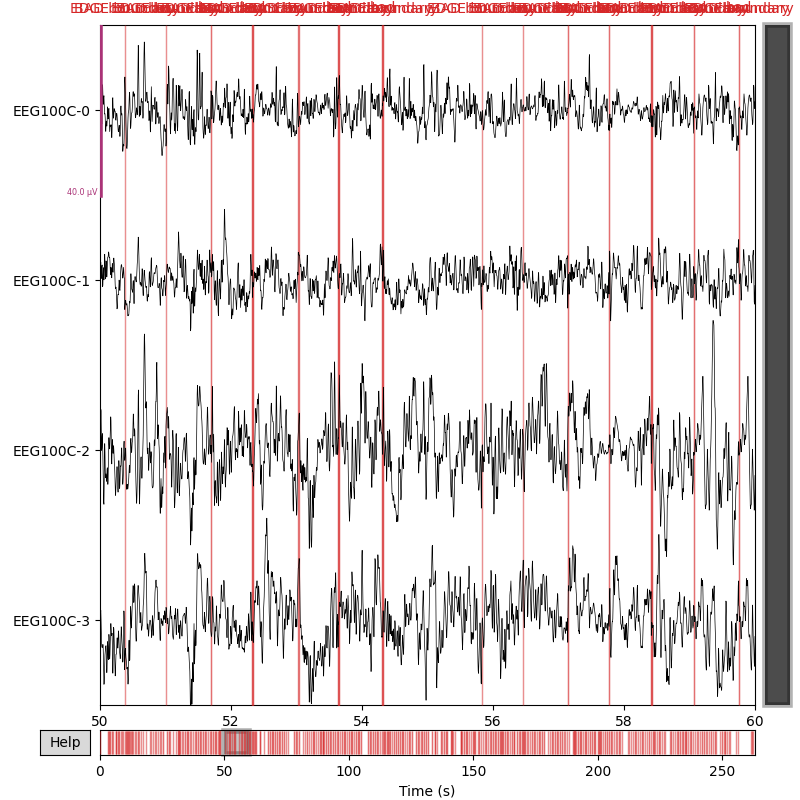

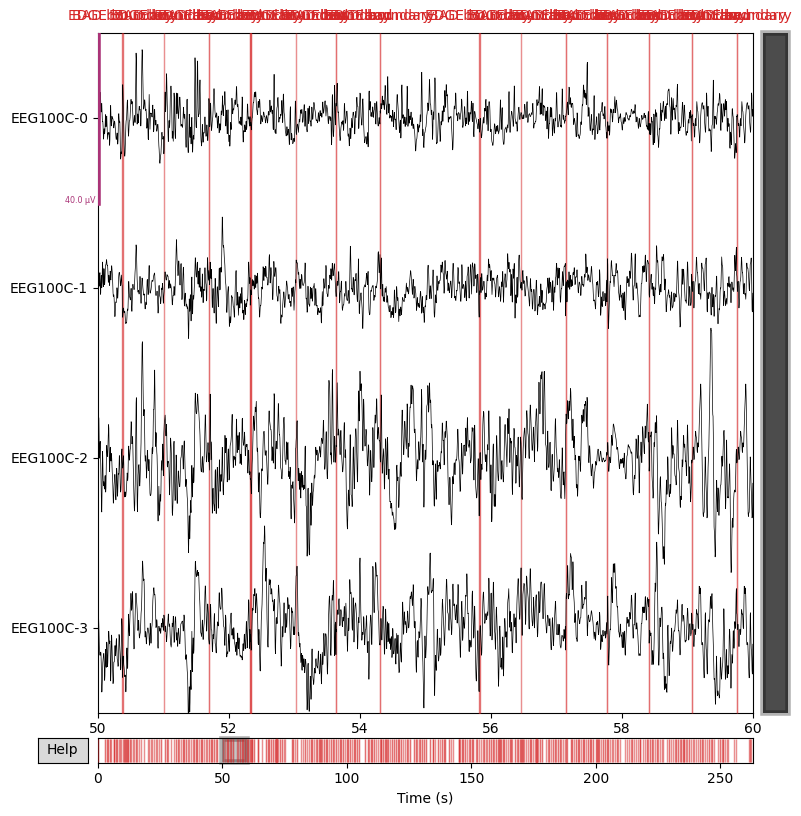

In [29]:
#eeg_picks = mne.pick_types(raw.info, meg=False, eeg=True)

crop_raw.plot(duration=10, start=50)

In [30]:
crop_raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG100C-0, EEG100C-1, EEG100C-2, EEG100C-3
 chs: 4 EEG
 custom_ref_applied: False
 highpass: 1.0 Hz
 lowpass: 50.0 Hz
 meas_date: 2023-06-12 18:05:20 UTC
 nchan: 4
 projs: []
 sfreq: 250.0 Hz
>

In [31]:
type(crop_raw)

mne.io.edf.edf.RawEDF

In [ ]:
len(crop_raw[0][0][0])

In [ ]:
len(crop_raw[0][1])

In [ ]:
crop_raw[0][0][0]

In [ ]:
crop_raw[0][1]

In [ ]:
plt.close()
plt.plot(crop_raw[0][0][0])
plt.show()

In [32]:
# Remove NaN values
raw_data_no_nan = crop_raw._data[ : , ~np.isnan(crop_raw._data).any(axis=0)]

In [33]:
raw_data_no_nan

array([[ 6.38169142e-21,  2.50564073e-07, -2.26030650e-06, ...,
        -1.36882341e-06,  5.52409535e-06,  1.15008858e-05],
       [-5.06650974e-21, -8.74252519e-07, -1.26062785e-06, ...,
         1.90358539e-06,  5.04451272e-06,  8.33350080e-06],
       [-1.45072686e-20, -1.16477656e-06,  2.48930343e-08, ...,
         1.61948434e-07,  1.14685442e-06,  4.34802980e-06],
       [-5.96293700e-21, -4.78145525e-07, -2.56814970e-06, ...,
        -5.56390255e-06, -2.85034014e-06,  2.19889240e-06]])

In [34]:
tem_raw = mne.io.RawArray(raw_data_no_nan, crop_raw.info)

Creating RawArray with float64 data, n_channels=4, n_times=65792
    Range : 0 ... 65791 =      0.000 ...   263.164 secs
Ready.


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


/tmp/ipykernel_368/444399173.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  tem_raw.plot_psd()


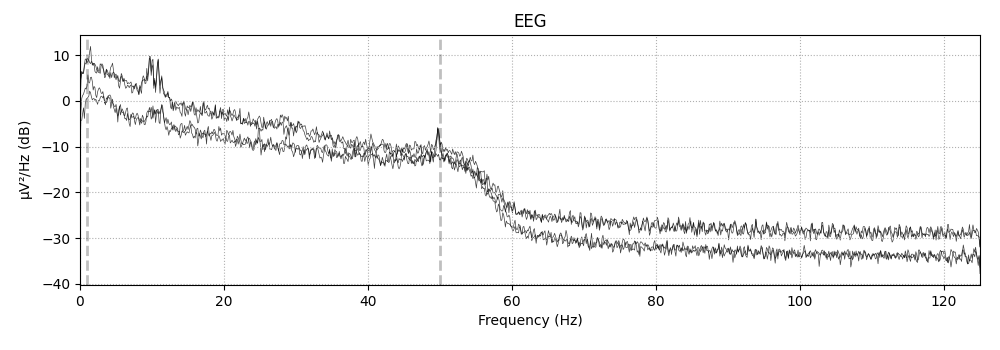

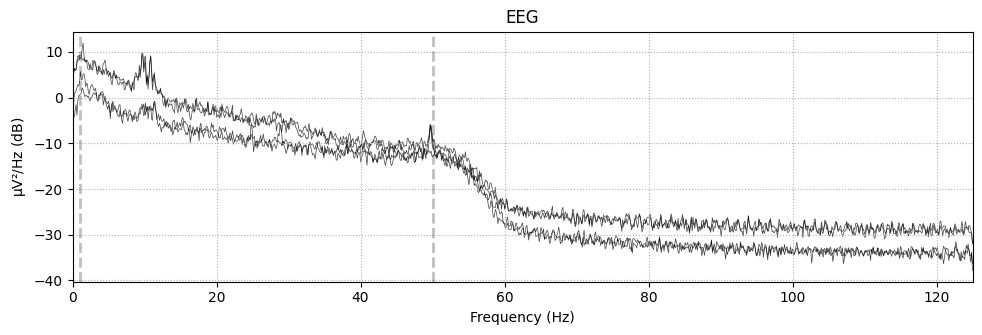

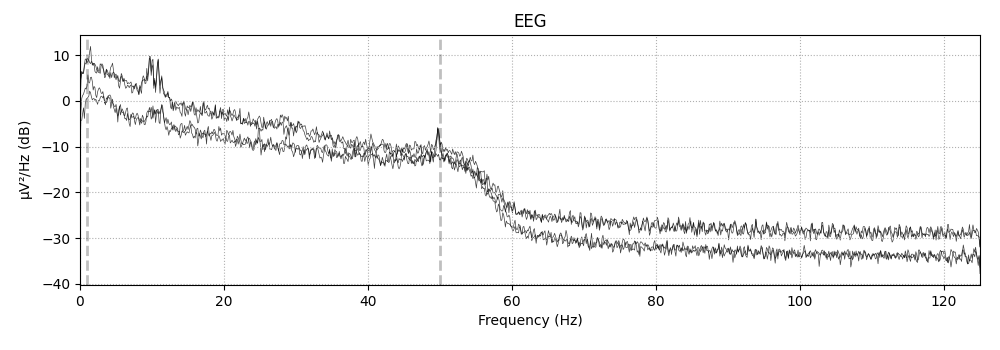

In [35]:
tem_raw.plot_psd()

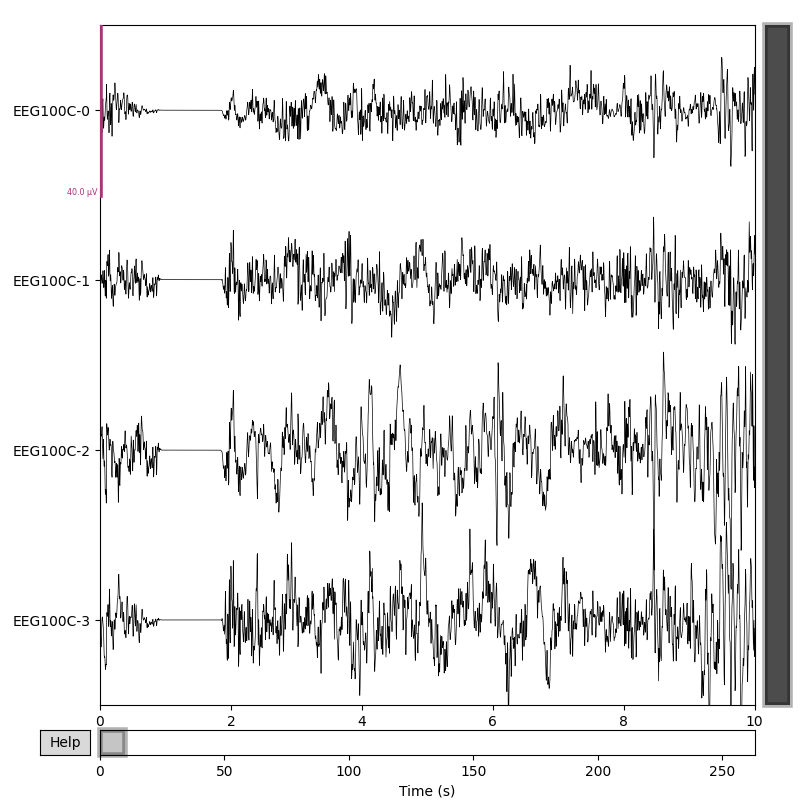

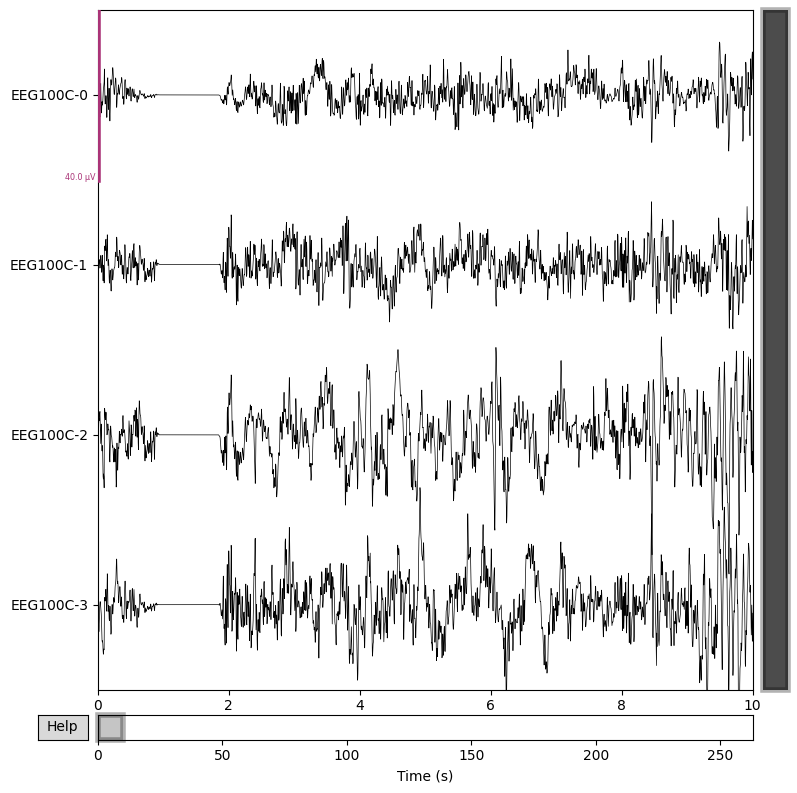

In [36]:
tem_raw.plot()

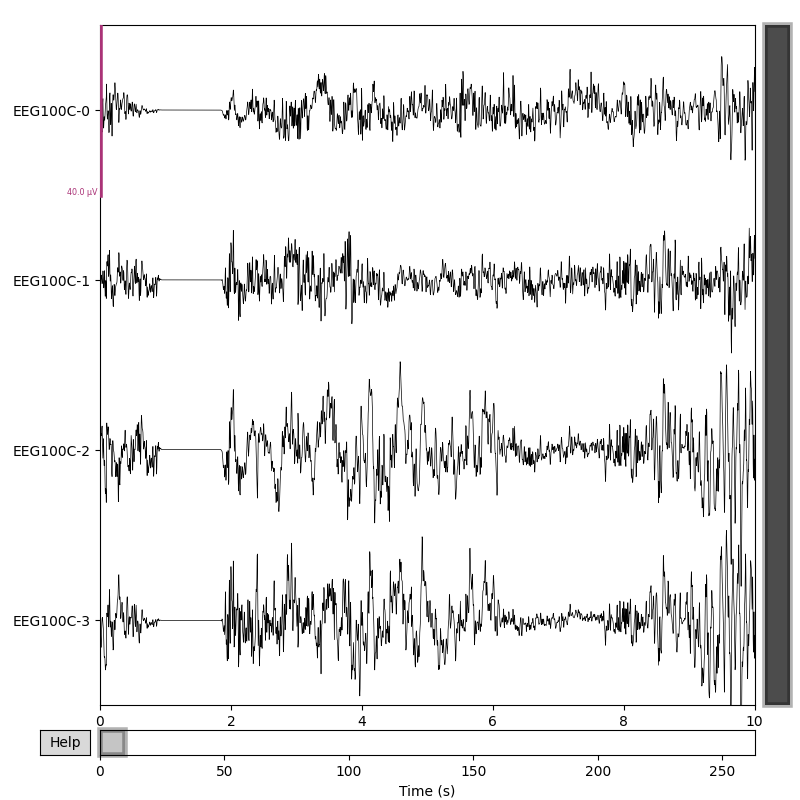

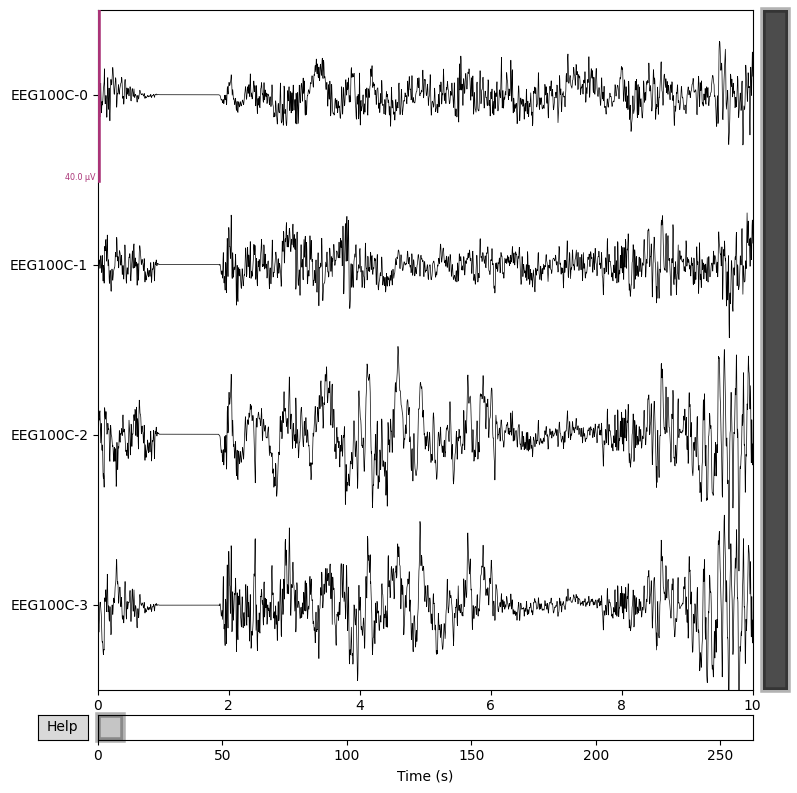

In [43]:
# use asr algorithm to handle big noise pattern 
asr = asrpy.ASR(
    sfreq=tem_raw.info["sfreq"], 
    blocksize=200, 
    cutoff=2.5, 
    win_len=3, 
    win_overlap=0.66
)

asr.fit(tem_raw.load_data())
tem_raw = asr.transform(tem_raw.load_data())


plt.close()
tem_raw.plot(duration=10, start=0, title='with ASR auto rejection')

In [3]:
## Numpy FFT
fs = crop_raw.info['sfreq']
duration_sec = int(len(raw_data_no_nan[0])/fs)  


fft1 = np.fft.fft(raw_data_no_nan[0])/(fs*duration_sec)
f = np.fft.fftfreq(fs*duration_sec, 1/ fs)

amp_ffts = np.abs(fft1)
        
## FFT result plotting
fig_FFT = plt.figure()
plt.plot(f, amp_ffts)                # 증폭된 신호 plotting

plt.xlim(0,100)     # Frequency 표시 범위 : 0~100Hz
plt.title('FFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


NameError: name 'crop_raw' is not defined

In [68]:
tem_raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG100C-0, EEG100C-1, EEG100C-2, EEG100C-3
 chs: 4 EEG
 custom_ref_applied: False
 highpass: 1.0 Hz
 lowpass: 50.0 Hz
 meas_date: 2023-06-12 18:05:20 UTC
 nchan: 4
 projs: []
 sfreq: 250.0 Hz
>

In [80]:
# save processed data (raw data after filtering and ecg noise rejection, ars noise rejction

tem_raw.export(fname='kym_5min_re.edf', fmt='edf', overwrite=True)
tem_raw.export(fname='kym_5min_re.set', fmt='eeglab', overwrite=True)


Overwriting existing file.


/tmp/ipykernel_368/3031692221.py:3: RuntimeWarning: EDF format requires equal-length data blocks, so 0.832 seconds of zeros were appended to all channels when writing the final block.
  tem_raw.export(fname='kym_5min_re.edf', fmt='edf', overwrite=True)


In [ ]:
# plot processed data (PSD and Spectrogram)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


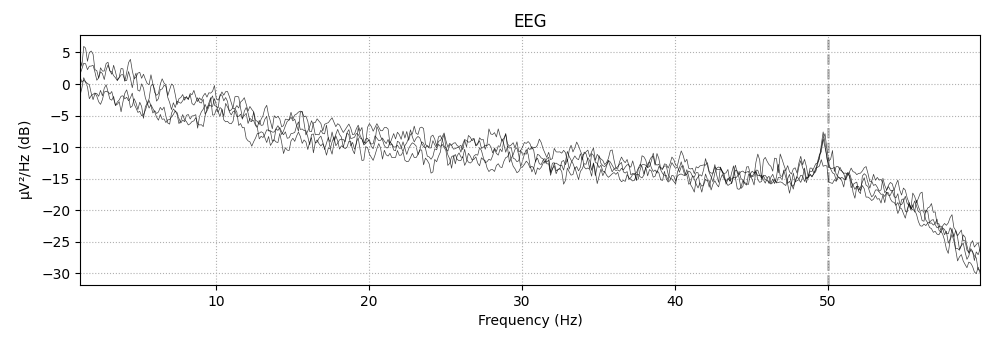

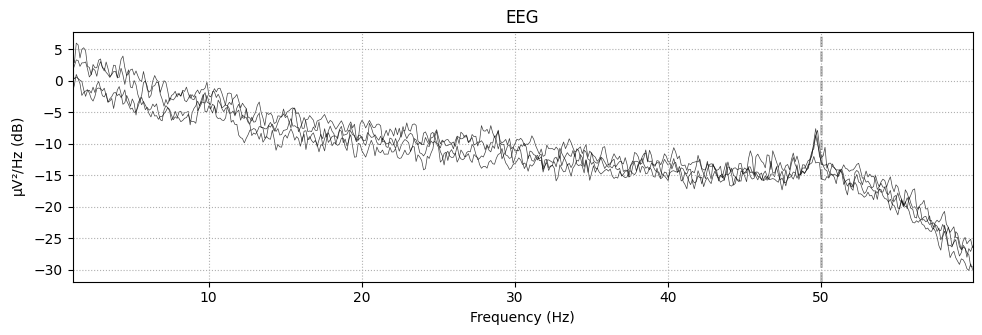

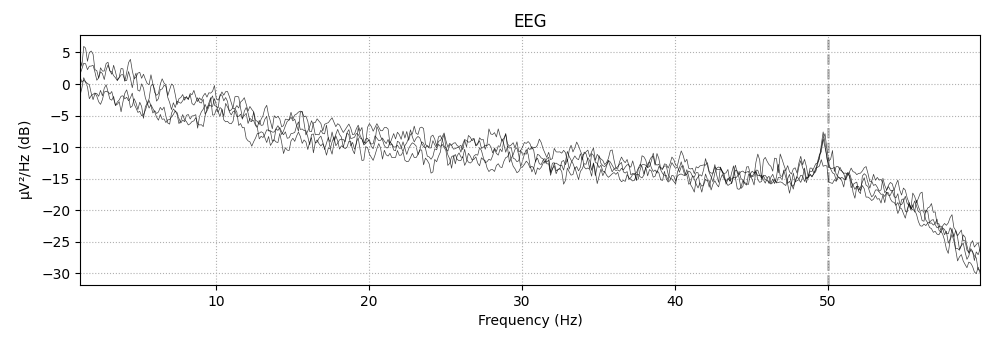

In [65]:
tem_raw.plot_psd(fmin=1, fmax=60, spatial_colors=False)

In [ ]:
# Calculate Absolute and relative power

In [84]:
psds, freqs = mne.time_frequency.psd_array_welch(raw_data_no_nan, sfreq=tem_raw.info['sfreq'])

Effective window size : 1.024 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [161]:
psds, freqs = mne.time_frequency.psd_array_welch(raw_data_no_nan, sfreq=tem_raw.info['sfreq'], fmin=4, fmax=8)

Effective window size : 1.024 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [162]:
psds.shape, freqs.shape

((4, 4), (4,))

In [163]:
psds[0]

array([7.39610812e-13, 5.83162117e-13, 4.96462587e-13, 4.56761266e-13])

/tmp/ipykernel_368/3163766798.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure().clear()


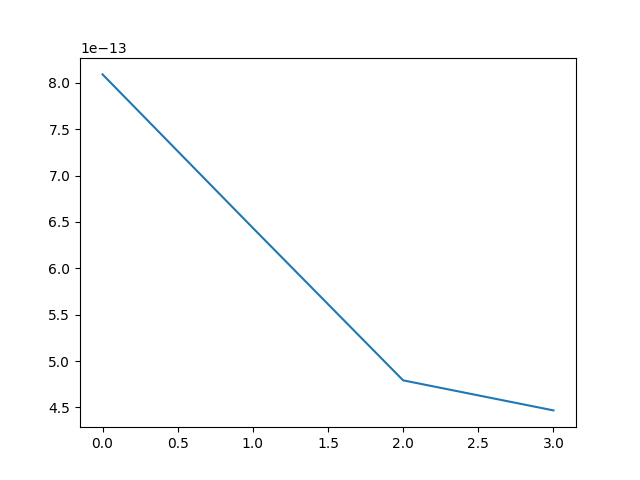

In [164]:
plt.figure().clear()
plt.plot(psds[1])
plt.show()

In [151]:
list(eeg_bands.keys())

['Delta', 'Theta', 'Alpha', 'Smr', 'L-Beta', 'H-Beta', 'Gamma']

In [187]:
import pandas as pd


# Define EEG bands
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (9, 12),
             'Smr': (13, 15),
             'L-Beta': (16, 20),
             'H-Beta': (21, 30),
             'Gamma': (31, 50)}

col = list(eeg_bands.keys())
power = pd.DataFrame(np.zeros((4, 7)), columns=col, index= ['T7', 'T8', 'Fp1', 'Fp2'])

In [188]:
power

Delta  Theta  Alpha  Smr  L-Beta  H-Beta  Gamma
T7     0.0    0.0    0.0  0.0     0.0     0.0    0.0
T8     0.0    0.0    0.0  0.0     0.0     0.0    0.0
Fp1    0.0    0.0    0.0  0.0     0.0     0.0    0.0
Fp2    0.0    0.0    0.0  0.0     0.0     0.0    0.0

In [189]:

for band in eeg_bands:

    psds, freqs = mne.time_frequency.psd_array_welch(raw_data_no_nan, sfreq=tem_raw.info['sfreq'], fmin=eeg_bands[band][0], fmax=eeg_bands[band][1])
    
    for ch in range(0, len(psds)):
        #ch_avg.append(np.mean(psds[ch]))
        print(len(psds[ch]))
        power[band][ch] = np.sum(psds[ch]) 

Effective window size : 1.024 (s)
5
5
5
5
Effective window size : 1.024 (s)
4
4
4
4
Effective window size : 1.024 (s)
3
3
3
3
Effective window size : 1.024 (s)
2
2
2
2
Effective window size : 1.024 (s)
4
4
4
4
Effective window size : 1.024 (s)
9
9
9
9
Effective window size : 1.024 (s)
20
20
20
20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

In [191]:
power

Delta         Theta  ...        H-Beta         Gamma
T7   4.434926e-12  2.275997e-12  ...  1.203824e-12  1.447402e-12
T8   6.835330e-12  2.378617e-12  ...  1.085043e-12  1.366583e-12
Fp1  2.532103e-11  1.180809e-11  ...  3.540819e-12  2.731617e-12
Fp2  2.220603e-11  9.691522e-12  ...  2.857337e-12  2.162910e-12

[4 rows x 7 columns]

In [193]:
power.dtypes

Delta     float64
Theta     float64
Alpha     float64
Smr       float64
L-Beta    float64
H-Beta    float64
Gamma     float64
dtype: object

In [195]:
power['Total'] = power.sum(axis=1)

In [196]:
power

Delta         Theta  ...         Gamma         Total
T7   4.434926e-12  2.275997e-12  ...  1.447402e-12  1.229591e-11
T8   6.835330e-12  2.378617e-12  ...  1.366583e-12  1.434404e-11
Fp1  2.532103e-11  1.180809e-11  ...  2.731617e-12  5.769900e-11
Fp2  2.220603e-11  9.691522e-12  ...  2.162910e-12  5.130863e-11

[4 rows x 8 columns]

In [205]:
power.shape

(4, 8)

In [209]:
power.iloc[0][7]

1.229590867582453e-11

In [214]:
rel_power = np.zeros(power.shape)
for i in range(0, power.shape[0]):
    for j in range(0, power.shape[1]):
        rel_power[i][j] =  power.iloc[i][j] / power.iloc[i][7]

In [216]:
rel_power = pd.DataFrame(data=rel_power, index=power.index, columns=power.columns)

In [224]:
rel_power.drop(columns='Total', inplace=True)

In [225]:
rel_power

Delta     Theta     Alpha       Smr    L-Beta    H-Beta     Gamma
T7   0.360683  0.185102  0.130086  0.040446  0.068065  0.097904  0.117714
T8   0.476528  0.165826  0.105488  0.031387  0.049855  0.075644  0.095272
Fp1  0.438847  0.204650  0.175124  0.029662  0.043008  0.061367  0.047343
Fp2  0.432793  0.188887  0.212265  0.027705  0.040505  0.055689  0.042155

<AxesSubplot:>

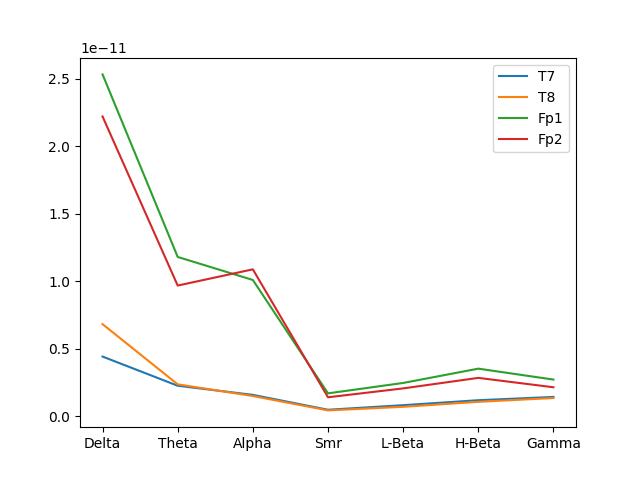

In [230]:
#abs  power
power.iloc[:, :-1].T.plot()  

<AxesSubplot:>

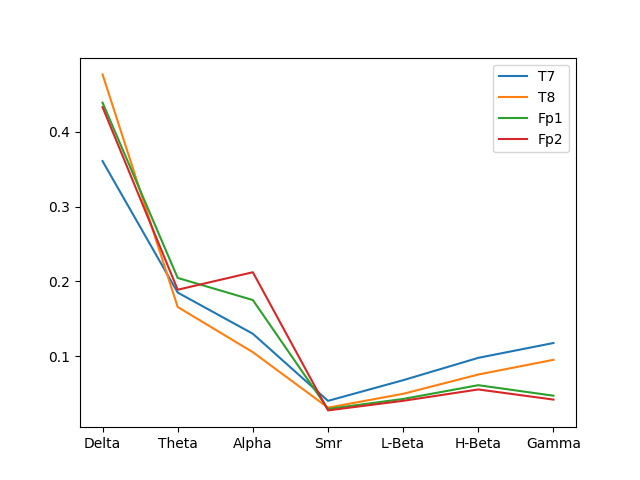

In [227]:
#rel power
rel_power.T.plot()

In [ ]:
# save results to excel or other tableaue format 

In [232]:
rel_power.to_csv('kym_5min_re.csv')